# 04. 케라스의 SimpleRNN과 LSTM 이해하기 

1. 임의의 입력 생성하기 

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, LSTM, Bidirectional

# 단어 벡터 차원: 5, 문장의 길이(=timesteps): 4 
train_X = [[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]
print(np.shape(train_X))

(4, 5)


In [ ]:
# RNN은 3D tensor를 입력으로 받으므로 'batch_size = 1' 추가 
train_X = [[[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]]
train_X = np.array(train_X, dtype = np.float32)
print(train_X.shape)    #(batch_size, timesteps, input_dim)

(1, 4, 5)


2. SimpleRNN 이해하기 

In [ ]:
rnn = SimpleRNN(3)
hidden_state = rnn(train_X)

print('hidden state : {}, shape: {}' .format(hidden_state, hidden_state.shape))

hidden state : [[ 0.42418545  0.32868597 -0.755082  ]], shape: (1, 3)


- tensor 크기: (1, 3)  -> 마지막 시점의 은닉 상태


In [ ]:
# return_sequences = True 일 때
rnn = SimpleRNN(3, return_sequences = True)
hidden_states = rnn(train_X)

print('hidden states : {}, shape: {}' .format(hidden_states, hidden_states.shape))

hidden states : [[[ 0.9186998   0.99811924 -0.9075843 ]
  [-0.19797651  0.99811083 -0.6221271 ]
  [ 0.72475934  0.17207484 -0.8128884 ]
  [-0.7552871   0.98433244 -0.9895084 ]]], shape: (1, 4, 3)


In [ ]:
# return_state = True 일 때
rnn = SimpleRNN(3, return_sequences = True, return_state = True)
hidden_states, last_state = rnn(train_X)

print('hidden states : {}, shape: {}' .format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape: {}' .format(last_state, last_state.shape))

hidden states : [[[ 0.9875129   0.99942946 -0.40160546]
  [ 0.7983999   0.9244115  -0.81752264]
  [ 0.88785684  0.9712248  -0.60742706]
  [ 0.15264252 -0.4773209  -0.94099575]]], shape: (1, 4, 3)
last hidden state : [[ 0.15264252 -0.4773209  -0.94099575]], shape: (1, 3)


- return_state = True 일 때, return_sequences의 True/False 상관없이 마지막 시점의 은닉 상태 출력 

3. LSTM 이해하기 

In [ ]:
# return_sequences = False 일 때
lstm = LSTM(3, return_sequences = False, return_state = True)
hidden_state, last_state, last_cell_state = lstm(train_X)

print('hidden state : {}, shape: {}' .format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape: {}' .format(last_state, last_state.shape))
print('last cell state : {}, shape: {}' .format(last_cell_state, last_cell_state.shape))

hidden state : [[0.25836498 0.05449354 0.13752654]], shape: (1, 3)
last hidden state : [[0.25836498 0.05449354 0.13752654]], shape: (1, 3)
last cell state : [[0.39462745 0.13750455 1.6437708 ]], shape: (1, 3)


In [ ]:
# return_sequences = True 일 때
lstm = LSTM(3, return_sequences = True, return_state = True)
hidden_states, last_hidden_state, last_cell_state = lstm(train_X)

print('hidden states : {}, shape: {}' .format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape: {}' .format(last_hidden_state, last_hidden_state.shape))
print('last cell state : {}, shape: {}' .format(last_cell_state, last_cell_state.shape))

hidden states : [[[-0.23916048  0.03599311 -0.10309646]
  [-0.3010104   0.01168835 -0.17431393]
  [-0.45713452 -0.04060078 -0.17216393]
  [-0.20974675 -0.39785612 -0.16586073]]], shape: (1, 4, 3)
last hidden state : [[-0.20974675 -0.39785612 -0.16586073]], shape: (1, 3)
last cell state : [[-1.7476828 -0.6602154 -0.1904993]], shape: (1, 3)


- return_sequences = True 이므로, 첫번째 출력값은 모든 시점의 은닉 상태가 출력됨 

4. Bidirectional(LSTM) 이해하기 

In [ ]:
# 출력되는 은닉 상태 값 고정 
k_init = tf.keras.initializers.Constant(value = 0.1)
b_init = tf.keras.initializers.Constant(value = 0)
r_init = tf.keras.initializers.Constant(value = 0.1)

In [ ]:
# return_sequences = False, return_state = True 일 때
bilstm = Bidirectional(LSTM(3, return_sequences = False, return_state = True, 
                            kernel_initializer = k_init, bias_initializer = b_init, 
                            recurrent_initializer = r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

print('hidden states : {}, shape: {}' .format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}' .format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}' .format(backward_h, backward_h.shape))

hidden states : [[0.6303138 0.6303138 0.6303138 0.7038734 0.7038734 0.7038734]], shape: (1, 6)
forward state : [[0.6303138 0.6303138 0.6303138]], shape: (1, 3)
backward state : [[0.7038734 0.7038734 0.7038734]], shape: (1, 3)


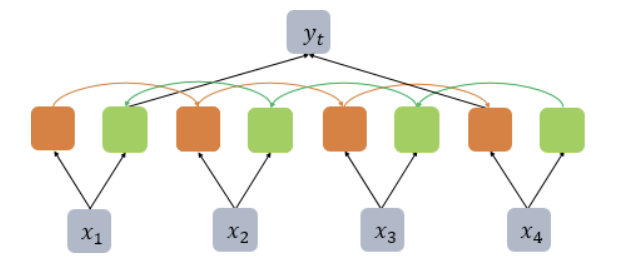

In [ ]:
# return_sequences = True 일 때
bilstm = Bidirectional(LSTM(3, return_sequences = True, return_state = True, 
                            kernel_initializer = k_init, bias_initializer = b_init, 
                            recurrent_initializer = r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

print('hidden states : {}, shape: {}' .format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}' .format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}' .format(backward_h, backward_h.shape))

hidden states : [[[0.35906473 0.35906473 0.35906473 0.7038734  0.7038734  0.7038734 ]
  [0.55111325 0.55111325 0.55111325 0.58863586 0.58863586 0.58863586]
  [0.59115744 0.59115744 0.59115744 0.3951699  0.3951699  0.3951699 ]
  [0.6303138  0.6303138  0.6303138  0.21942244 0.21942244 0.21942244]]], shape: (1, 4, 6)
forward state : [[0.6303138 0.6303138 0.6303138]], shape: (1, 3)
backward state : [[0.7038734 0.7038734 0.7038734]], shape: (1, 3)


- 모든 시점의 은닉 상태 출력됨
- 역방향 LSTM의 첫번째 시점 은닉 상태는 정방향 LSTM의 첫번째 시점 은닉 상태와 연결됨 

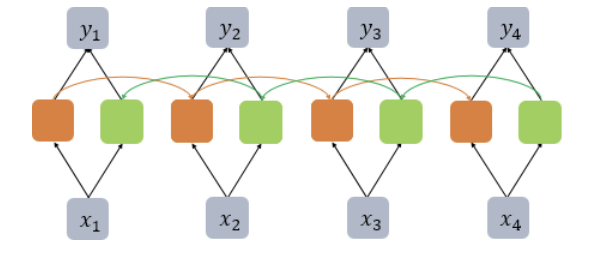